In [7]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = os.path.join(os.getcwd(), "data", "day_prepared.csv")
RS = 42

day_df = pd.read_csv(DATA_PATH)
day_df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,misty,rain,days_since_2011
0,0,0,8.175849,80.5833,10.749882,985,False,False,False,1,0,0
1,0,0,9.083466,69.6087,16.652113,801,False,False,False,1,0,1
2,0,1,1.229108,43.7273,16.636703,1349,False,False,False,0,0,2
3,0,1,1.400000,59.0435,10.739832,1562,False,False,False,0,0,3
4,0,1,2.666979,43.6957,12.522300,1600,False,False,False,0,0,4


In [4]:
X = day_df.drop("cnt", axis=1)
y = day_df["cnt"]
display(X.head())
display(y.head())

,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,misty,rain,days_since_2011
0,0,0,8.175849,80.5833,10.749882,False,False,False,1,0,0
1,0,0,9.083466,69.6087,16.652113,False,False,False,1,0,1
2,0,1,1.229108,43.7273,16.636703,False,False,False,0,0,2
3,0,1,1.400000,59.0435,10.739832,False,False,False,0,0,3
4,0,1,2.666979,43.6957,12.522300,False,False,False,0,0,4


0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [6]:
rf = RandomForestRegressor(random_state=RS)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

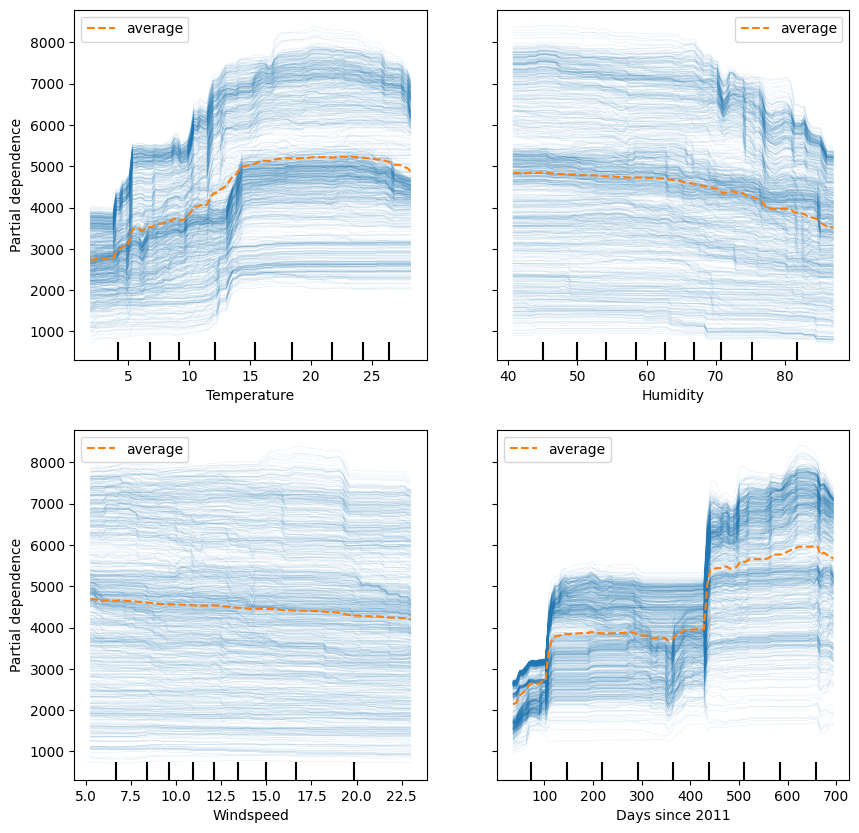

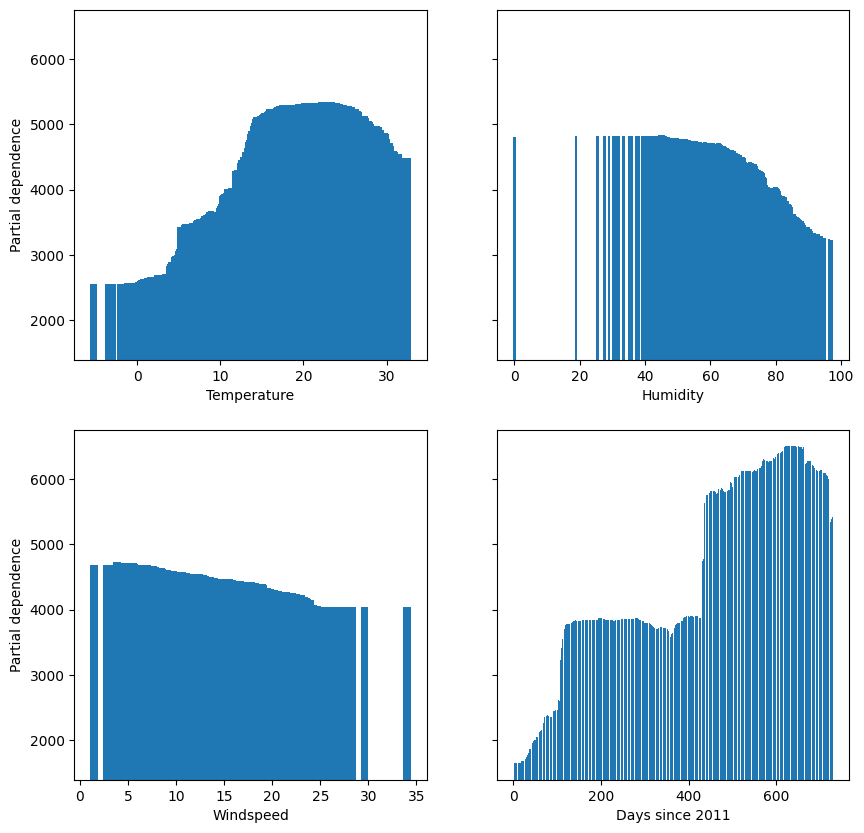

In [48]:
features = [
    "temp",
    "hum",
    "windspeed",
    "days_since_2011",
]

labels = [
    "Temperature",
    "Humidity",
    "Windspeed",
    "Days since 2011",
]

fig = plt.figure(figsize=(10, 10))
fig = fig.subplots(2, 2)
PartialDependenceDisplay.from_estimator(
    rf,
    X,
    features,
    ax=fig,
    kind="both",
    random_state=RS,
    ice_lines_kw={"alpha": 0.1},
    # line_kw={"color": "red"},
)

for ax, label in zip(fig.ravel(), labels):
    ax.set_xlabel(label)

plt.show()

fig = plt.figure(figsize=(10, 10))
fig = fig.subplots(2, 2)
PartialDependenceDisplay.from_estimator(
    rf,
    X,
    features,
    ax=fig,
    grid_resolution=700,
    categorical_features=features,
    random_state=RS,
)

for ax, label in zip(fig.ravel(), labels):
    ax.set_xlabel(label)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)


plt.show()
